In [1]:
import numpy as np
from RL import grid_world_mdp
from RL import RL
from RL import grid_display

In [2]:
grid_rows = 4
grid_cols = 4
actions = 4
terminal_states = [0, 15]

# Creating Grid World MDP

## - Default is to have -1 reward for each move and no noise meaning if an action is chosen it will be executed unless that actions is not a legal move, in which case the move will lead you to stay in the same grid square.

In [3]:
mdp = grid_world_mdp(grid_rows, grid_cols, actions, terminal_states)

# Iterative Policy Evaluation Under Random Policy

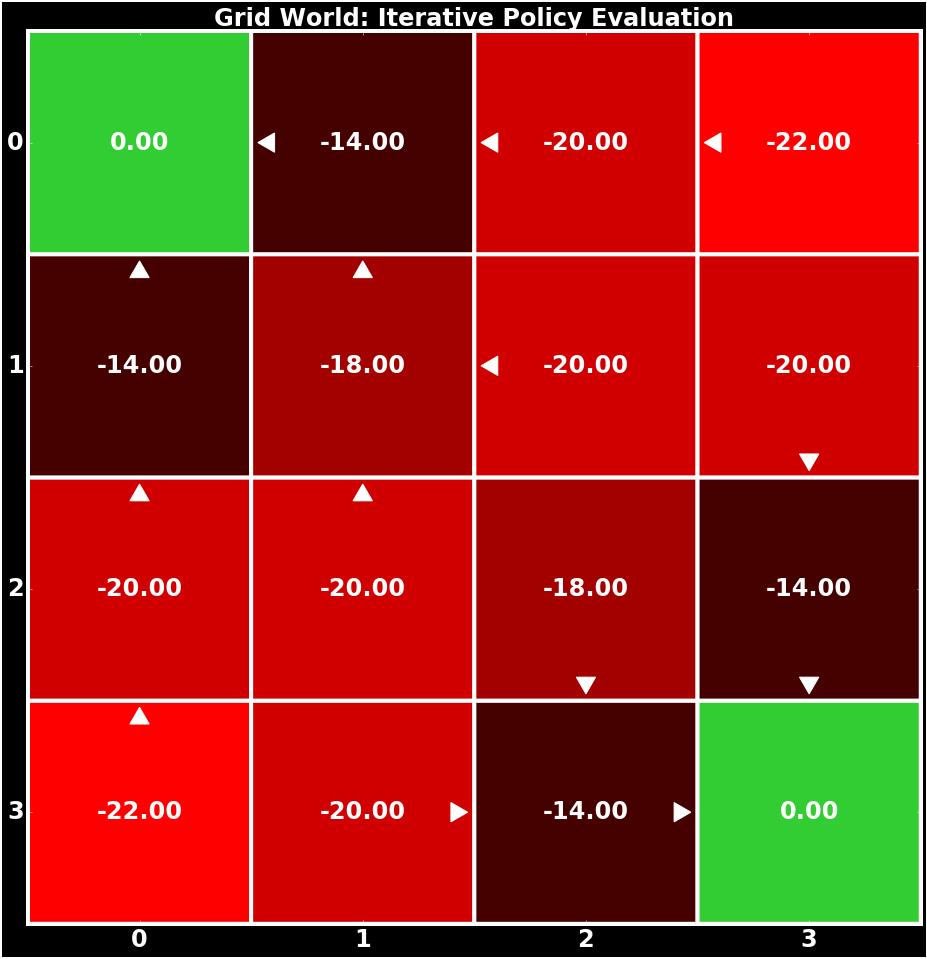

In [4]:
rl = RL(mdp)

rl.iterative_policy_evaluation()

display = grid_display(rl, title='Grid World: Iterative Policy Evaluation', savefig=True)
display.show_values()

# Policy Iteration to find optimal policy and the value function under the optimal policy

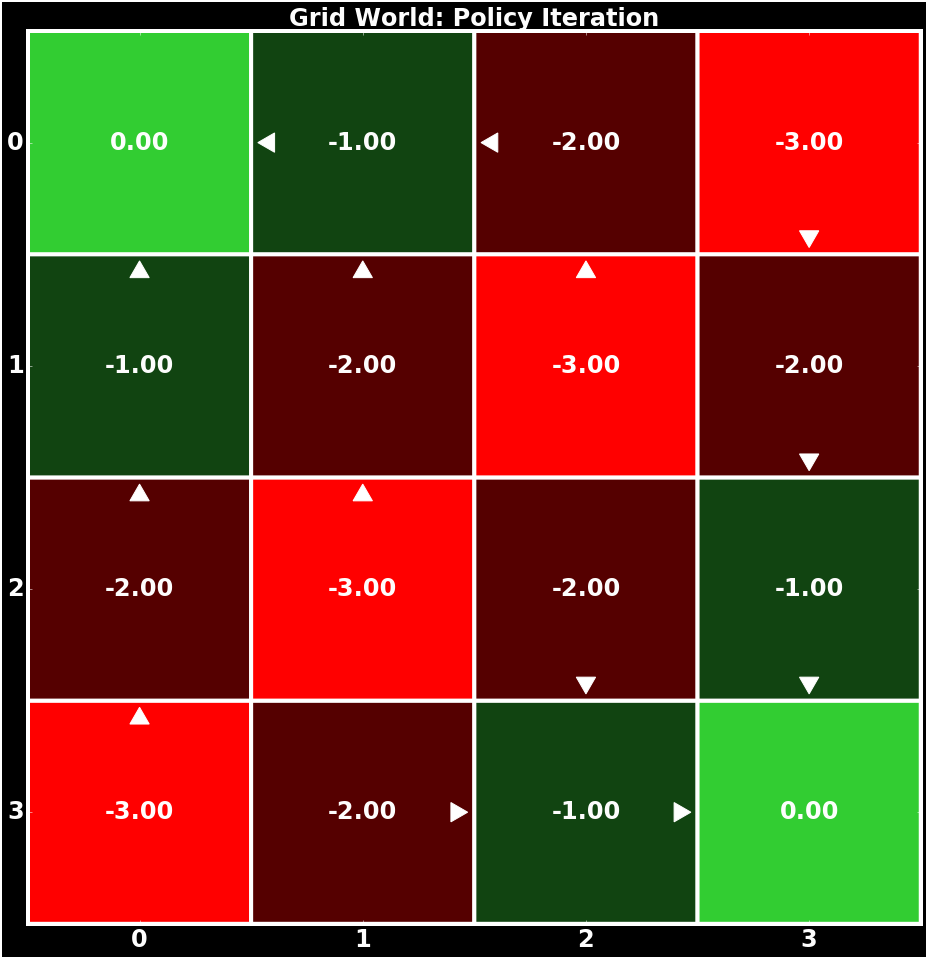

In [5]:
rl.policy_iteration()

display = grid_display(rl, title='Grid World: Policy Iteration', savefig=True)
display.show_values()

# Value Iteration

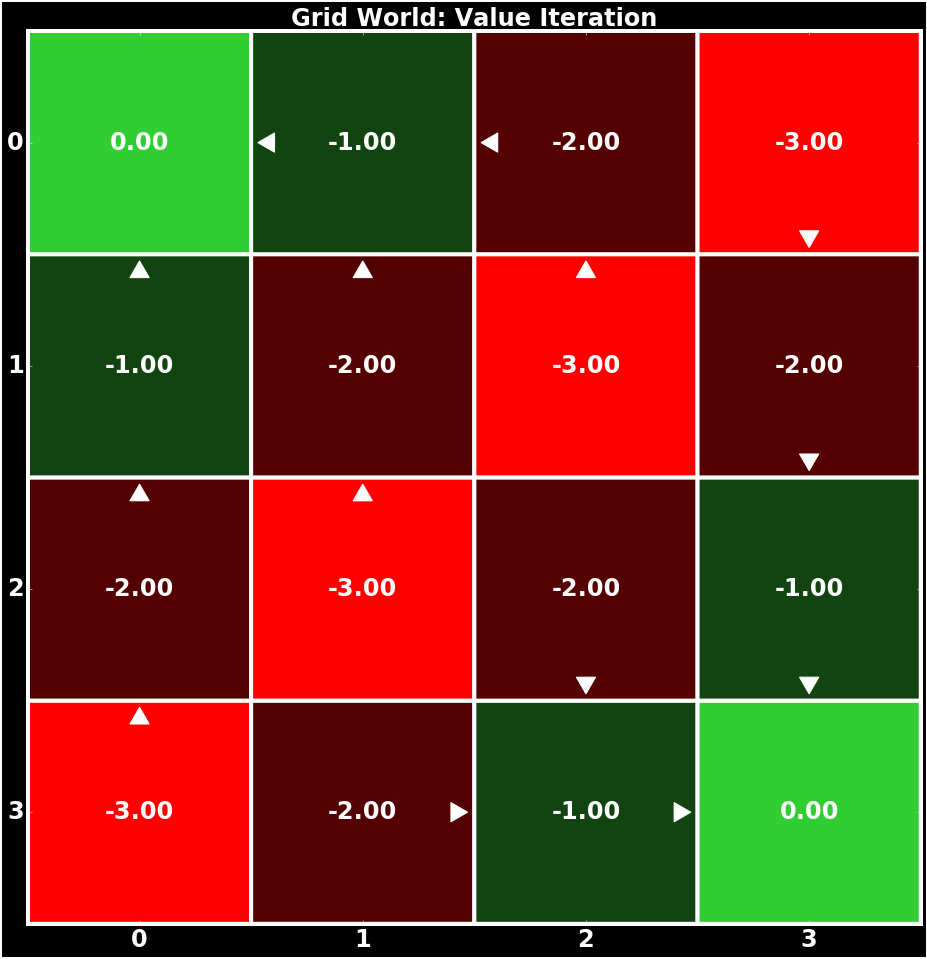

In [6]:
rl.value_iteration()

display = grid_display(rl, title='Grid World: Value Iteration', savefig=True)
display.show_values()

# One step temporal difference 

# - Evaluating the value function for the optimal policy from earlier using one step temporal difference.

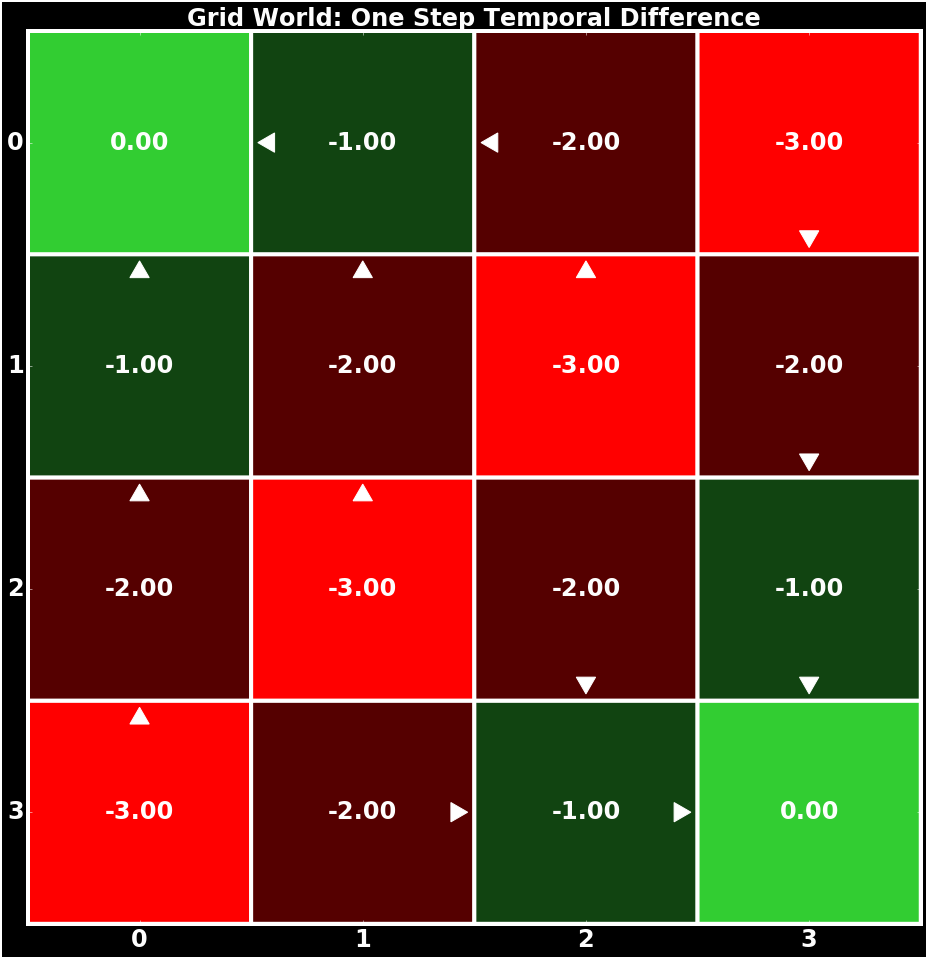

In [7]:
rl.one_step_temporal_difference()

display = grid_display(rl, title='Grid World: One Step Temporal Difference', savefig=True)
display.show_values()

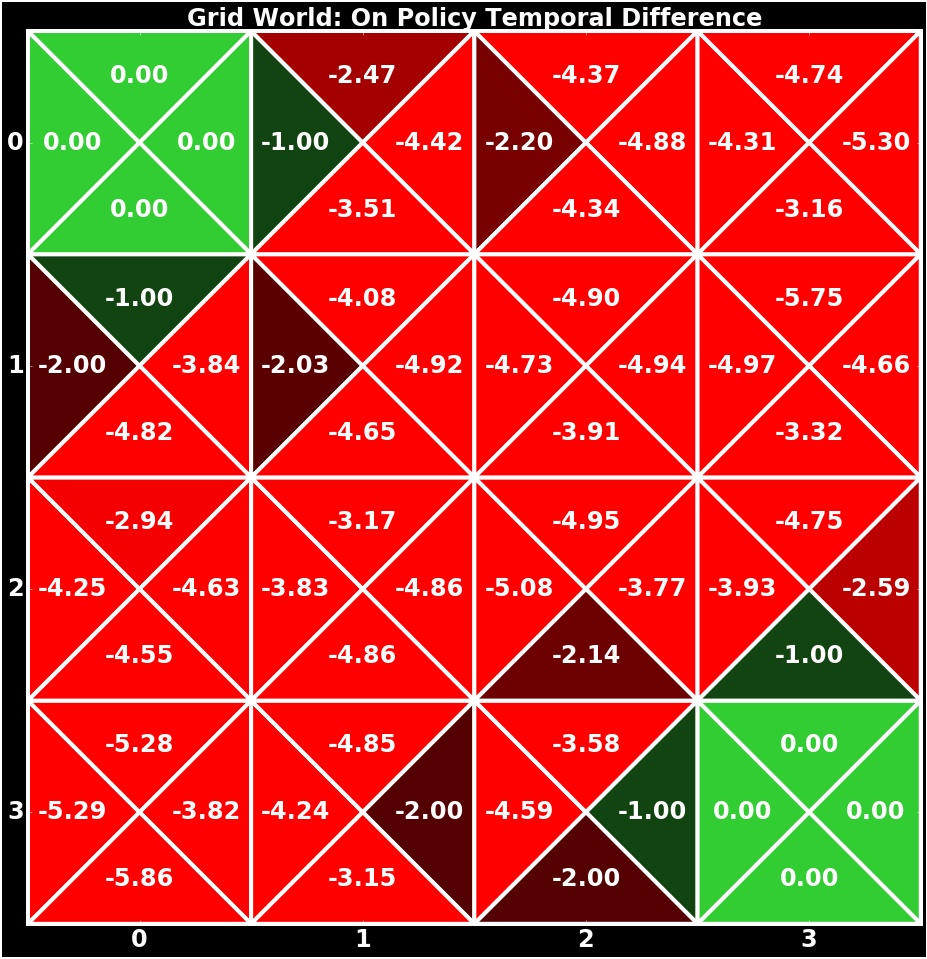

In [8]:
rl.on_policy_temporal_difference(alpha=.5, epsilon=.2, num_episodes=100000000)
display = grid_display(rl, title='Grid World: On Policy Temporal Difference', savefig=True)
display.show_q_values()

In [9]:
display.q_values

[(-5.2754453417056162,
  -5.8582318144731449,
  -3.8231837044618633,
  -5.2869132152054483),
 (-4.8479444244947612,
  -3.1484167343608696,
  -2.0000000000064961,
  -4.2380917294015834),
 (-3.5786864265911449, -2.0010380795354488, -1.0, -4.5911201805665867),
 (0.0, 0.0, 0.0, 0.0),
 (-2.9405955904312355,
  -4.5499760577937582,
  -4.6320711826571355,
  -4.2503688396447821),
 (-3.1650983910528607,
  -4.8567337394001289,
  -4.8624092433535742,
  -3.8347428912239359),
 (-4.9492626869404877,
  -2.1392225006750385,
  -3.771582759224529,
  -5.0770990450140934),
 (-4.7512018062150734, -1.0, -2.5903570028779432, -3.9331279913430004),
 (-1.0, -4.8151449325780131, -3.836045348959825, -2.0000929888079888),
 (-4.0766120610840346,
  -4.6456055326950416,
  -4.9216865215751611,
  -2.0306478335166687),
 (-4.904392612389918,
  -3.9099168348955722,
  -4.9384946343916631,
  -4.7294666377364853),
 (-5.7513974923048101,
  -3.3196409236159004,
  -4.6561360464491646,
  -4.9707038879789218),
 (0.0, 0.0, 0.0, 0.0